In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race/ethnicity               1000 non-null   str  
 2   parental level of education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test preparation course      1000 non-null   str  
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.6 KB


In [10]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='str')

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [26]:
print("Categories in gender variable: ", end=' ')
print(df['gender'].unique())

print("Categories in race/ethnicity variable: ", end=' ')
print(df['race/ethnicity'].unique())

print("Categories in parental level of education variable: ", end=' ')
print(df['parental level of education'].unique())

print("Categories in lunch variable: ", end=' ')
print(df['lunch'].unique())

print("Categories in test preparation course  variable: ", end=' ')
print(df['test preparation course'].unique())
'''
print("Categories in math score variable: ", end=' ')
print(df['math score'].unique())

print("Categories in reading score variable: ", end=' ')
print(df['reading score'].unique())

print("Categories in writing score variable: ", end=' ')
print(df['writing score'].unique())
'''

Categories in gender variable:  <StringArray>
['female', 'male']
Length: 2, dtype: str
Categories in race/ethnicity variable:  <StringArray>
['group B', 'group C', 'group A', 'group D', 'group E']
Length: 5, dtype: str
Categories in parental level of education variable:  <StringArray>
[ 'bachelor's degree',       'some college',    'master's degree',
 'associate's degree',        'high school',   'some high school']
Length: 6, dtype: str
Categories in lunch variable:  <StringArray>
['standard', 'free/reduced']
Length: 2, dtype: str
Categories in test preparation course  variable:  <StringArray>
['none', 'completed']
Length: 2, dtype: str


'\nprint("Categories in math score variable: ", end=\' \')\nprint(df[\'math score\'].unique())\n\nprint("Categories in reading score variable: ", end=\' \')\nprint(df[\'reading score\'].unique())\n\nprint("Categories in writing score variable: ", end=\' \')\nprint(df[\'writing score\'].unique())\n'

In [29]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'str']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'str']

print('We have {} numerical features: {}'.format(len(num_features), num_features))
print('\nwe have {} categorical features: {}'.format(len(cat_features), cat_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']

we have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [40]:
df['total_marks'] = df['writing score'] + df['math score'] + df['reading score']
df['average'] = df['total_marks']/3

In [39]:
reading_full = df[df['reading score'] >= 90]['reading score'].count()
writing_full = df[df['writing score'] >= 90]['writing score'].count()
math_full = df[df['math score'] >= 90]['math score'].count()
print (f'Number of students with good marks in Maths: {math_full}')
print (f'Number of students with good marks in writing: {writing_full}')
print (f'Number of students with good marks in Reading: {reading_full}')


Number of students with good marks in Maths: 58
Number of students with good marks in writing: 78
Number of students with good marks in Reading: 79


In [38]:
reading_less_20 = df[df['reading score'] <= 20]['reading score'].count()
writing_less_20 =df[df['writing score'] <= 20]['writing score'].count()
math_less_20 = df [df['math score'] <= 20]['math score'].count()
print(f"Number of students with less than 20 marks in Maths: {math_less_20}")
print(f"Number of students with less than 20 marks in Writing: {writing_less_20}")
print(f"Number of students with less than 20 marks in raeding: {reading_less_20}")

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in raeding: 1


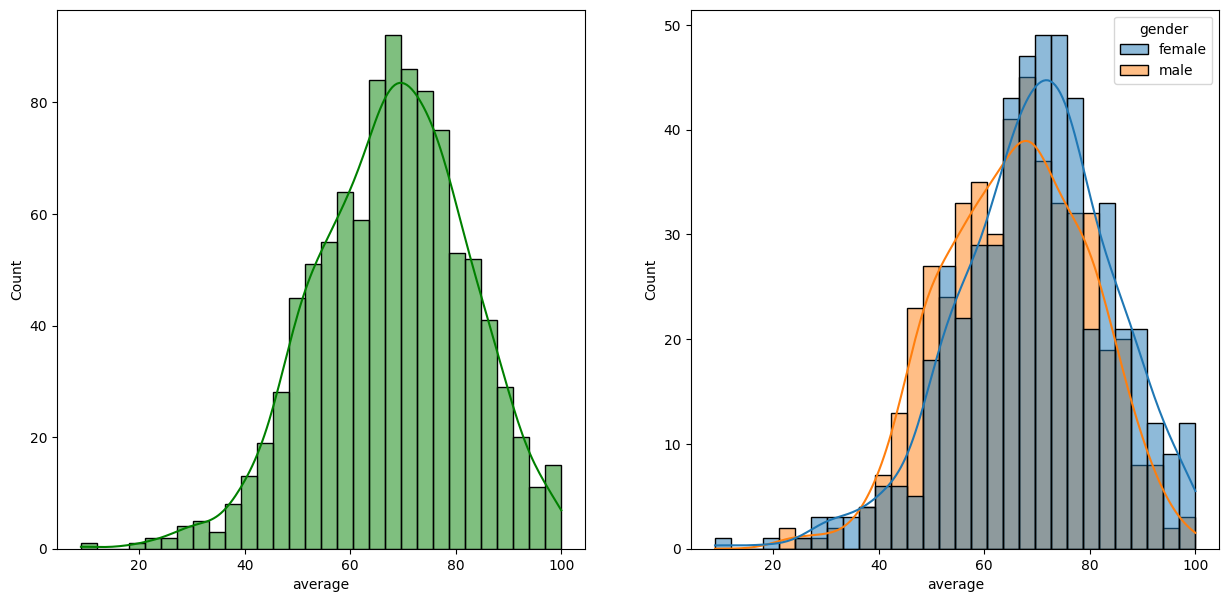

In [50]:
fig, axs = plt.subplots(1,2,figsize=(15,7)) 
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')
plt.show()

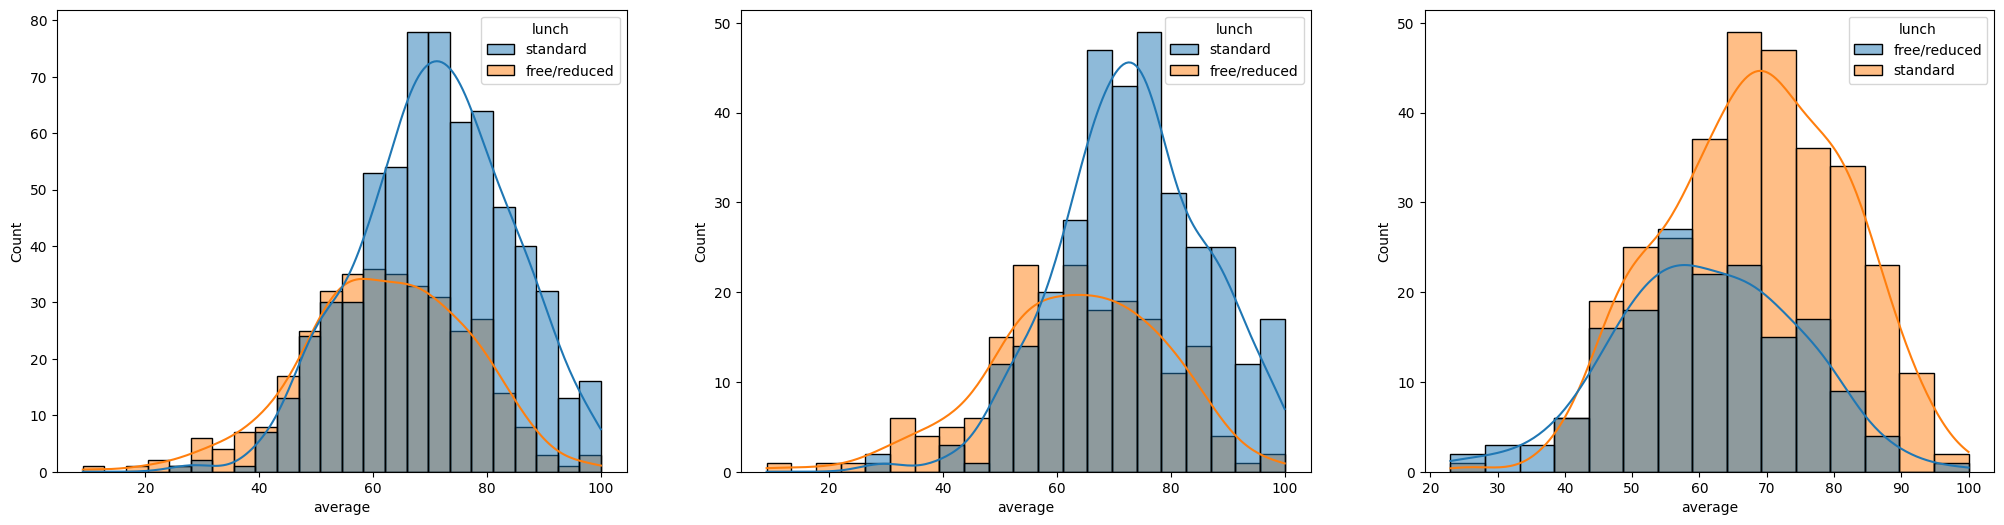

In [53]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average',kde=True, hue='lunch')
plt.show()